# 2.1 PCA (Principal Component Analysis)

## Import libraries

In [2]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [3]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
# Modulo para trabajar con los directorios del proyecto
from src.utils.paths import data_dir

In [4]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir


## Set up

In [5]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [6]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_CSV_PATH = data_dir("intermediate", "df_wine_merged.csv")

WINES_CSV_PATH

WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/intermediate/df_wine_merged.csv')

In [7]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINES_CSV_PATH)

In [8]:
shape_df =df_wine.shape
print(f"{shape_df=}")

shape_df=(5013, 21)


In [9]:
#Head del df
df_wine.head()

,winery,wine,year,rating,region,price,type,body,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,Vinedos de Paganos,La Nieta,2015,4.7,Rioja,82.58,Rioja Red,4.0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
1,Emilio Moro,Malleolus de Valderramiro,2016,4.7,Ribera del Duero,84.95,Ribera Del Duero Red,5.0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
2,Emilio Moro,Malleolus de Sanchomartin,2016,4.7,Ribera del Duero,116.54,Ribera Del Duero Red,5.0,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red
3,Bodegas Mauro,Terreus Paraje de Cueva Baja,2017,4.7,Castilla y Leon,66.07,Tempranillo,4.0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
4,Vinedos de Paganos,La Nieta,2018,4.7,Rioja,89.90,Rioja Red,4.0,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red


In [10]:
# convertir el tipo de dato de la columna quality a categorical
df_wine.quality = df_wine.quality.astype('category')
df_wine.dtypes

winery                    object
wine                      object
year                       int64
rating                   float64
region                    object
price                    float64
type                      object
body                     float64
fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
style                     object
dtype: object

Para el analisis de PCA necesitamos trabajar solo con las variables numéricas por lo que creamos un dataframe con solo las variables numéricas.

In [11]:
# Nuevo dataframe con solo las columnas de tipo numericas
df_wine_numeric = df_wine.select_dtypes(include=['float64', 'int64'])
df_wine_numeric.head()

,year,rating,price,body,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,2015,4.7,82.58,4.0,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
1,2016,4.7,84.95,5.0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
2,2016,4.7,116.54,5.0,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2
3,2017,4.7,66.07,4.0,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
4,2018,4.7,89.90,4.0,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'body'}>],
       [<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

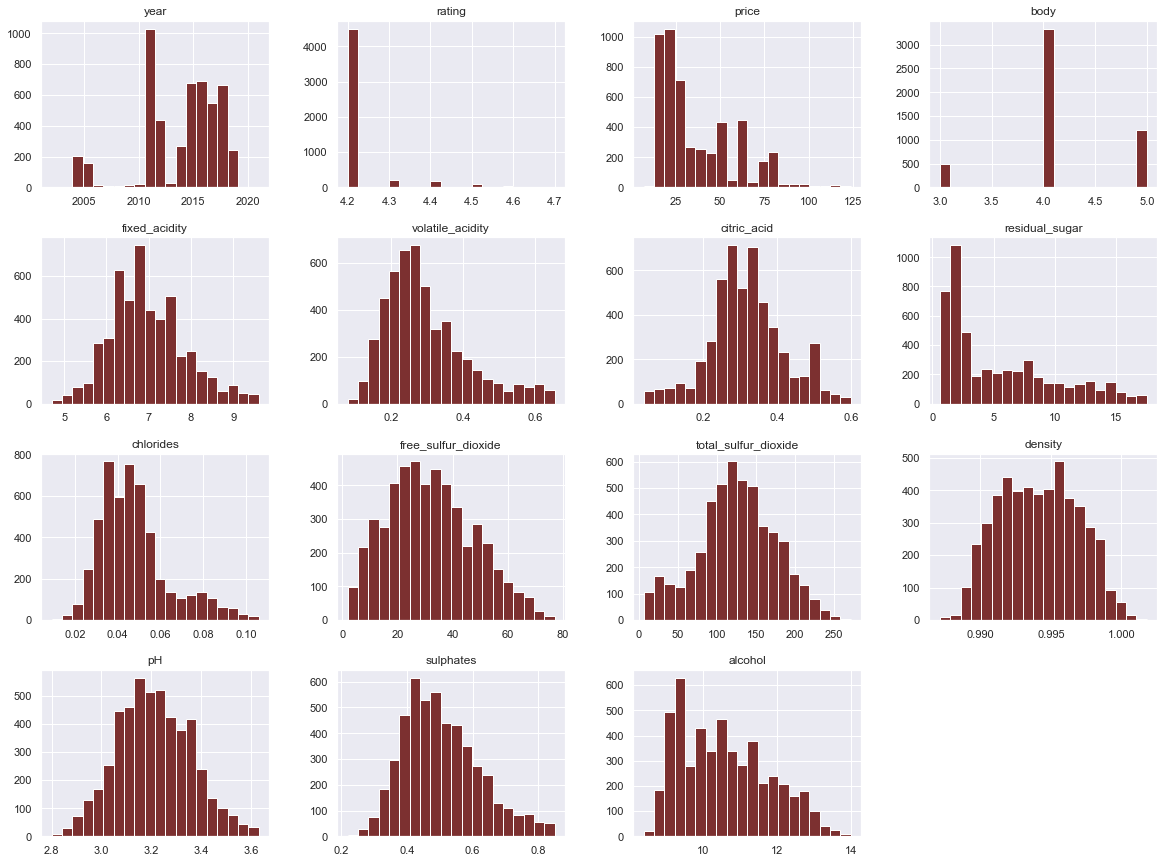

In [12]:
# Vemos la distribucion hist
df_wine_numeric.hist(bins=20, figsize=(20,15), color = COLOR_VINO_TINTO)

Observamos que la variable `body` tiene solo tres valores, por lo que podemos considerarla como categorica.
Además la variable `rating` tiene valores acotados y muy sesgados en el valor igual 4.2. 
Procedemos a sacar del analisis de PCA a ambas variables.

In [13]:
# Retiramos las columnas que no van a ser parte de nuestro analisis de PCA
df_wine_numeric = df_wine_numeric.drop(['body', 'rating'], axis=1)
df_wine_numeric.head()

,year,price,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,2015,82.58,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
1,2016,84.95,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
2,2016,116.54,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2
3,2017,66.07,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
4,2018,89.90,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5


## Normalizacion

Tenemos que preparar los datos para el analisis de PCA, para esto tenemos que sacarle las unidades a los datos. 
Como la distribuicion en parte de los datos no tiene una forma normal, es mejor para este caso aplicar normalizacion en vez de estandarizacion.
$$
\text{Normalizacion} = \frac{x - \text{min}}{\text{max} - \text{min}}
$$

In [24]:
# Normalizamos los datos con sklearn minmaxscaler
scaler = MinMaxScaler()
arr_wine_numeric_scaled = scaler.fit_transform(df_wine_numeric)
arr_wine_numeric_scaled

array([[0.68421053, 0.64734093, 0.65306122, ..., 0.60240964, 0.38095238,
        0.17857143],
       [0.73684211, 0.66763724, 0.57142857, ..., 0.6626506 , 0.92063492,
        0.375     ],
       [0.73684211, 0.93816905, 0.40816327, ..., 0.57831325, 0.50793651,
        0.14285714],
       ...,
       [0.78947368, 0.14952471, 0.36734694, ..., 0.22891566, 0.38095238,
        0.17857143],
       [0.47368421, 0.49250664, 0.16326531, ..., 0.65060241, 0.25396825,
        0.78571429],
       [0.73684211, 0.2110131 , 0.26530612, ..., 0.55421687, 0.15873016,
        0.60714286]])

In [25]:
# Convertimos el array de nuevo en un dataframe
df_scaled = pd.DataFrame(arr_wine_numeric_scaled, columns=df_wine_numeric.columns,index=df_wine_numeric.index)
df_scaled.head()


,year,price,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.684211,0.647341,0.653061,0.904348,0.035714,0.058997,0.618557,0.173333,0.199248,0.631543,0.602410,0.380952,0.178571
1,0.736842,0.667637,0.571429,0.730435,0.571429,0.324484,0.639175,0.200000,0.360902,0.726717,0.662651,0.920635,0.375000
2,0.736842,0.938169,0.408163,0.869565,0.071429,0.070796,0.907216,0.173333,0.221805,0.597553,0.578313,0.507937,0.142857
3,0.789474,0.505952,0.571429,0.730435,0.571429,0.324484,0.639175,0.200000,0.360902,0.726717,0.662651,0.920635,0.375000
4,0.842105,0.710028,0.775510,0.347826,0.928571,0.070796,0.855670,0.440000,0.364662,0.665534,0.602410,0.841270,0.375000


## PCA

In [26]:
# Creamos una lista de lo PCs que coincide con la cantidad de columnas
list_pcs = ["PC" + str(index+1) for index in range(len(df_scaled.columns))]
list_pcs

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13']

In [30]:
# PCA
# Creamos un objeto PCA
pca_model = PCA()
# Aplicamos el PCA
pca_model.fit_transform(df_scaled)
# Creamos un dataframe con los datos de la PCA
df_wine_numeric_scaled_pca = pd.DataFrame(data = pca_model.components_ , columns=df_scaled.columns, index= list_pcs)
df_wine_numeric_scaled_pca.head()

,year,price,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
PC1,0.007729,-0.051555,0.016079,-0.118588,0.086394,0.638246,0.013460,0.359413,0.358436,0.376007,-0.132434,-0.061947,-0.384117
PC2,-0.043421,0.228463,0.250486,0.412451,-0.135337,0.000891,0.449852,-0.268423,-0.223077,0.402284,0.167255,0.270092,-0.328338
PC3,-0.797722,0.562989,0.032404,-0.123110,0.108874,-0.006329,-0.056493,0.059884,0.042031,-0.048035,-0.064605,-0.046235,0.037703
PC4,0.090115,-0.071596,0.612697,-0.203041,0.524036,-0.027662,0.022462,-0.226000,-0.139579,0.049185,-0.467480,-0.027438,0.044477
PC5,0.052999,-0.011223,0.018669,-0.314219,0.379744,-0.351840,0.109994,0.331494,0.185108,0.035620,0.370153,0.571016,-0.096920


A partir de los componentes del modelo PCA entrenado podemos ver los pesos que tiena cada variable en esa componenete

<AxesSubplot:>

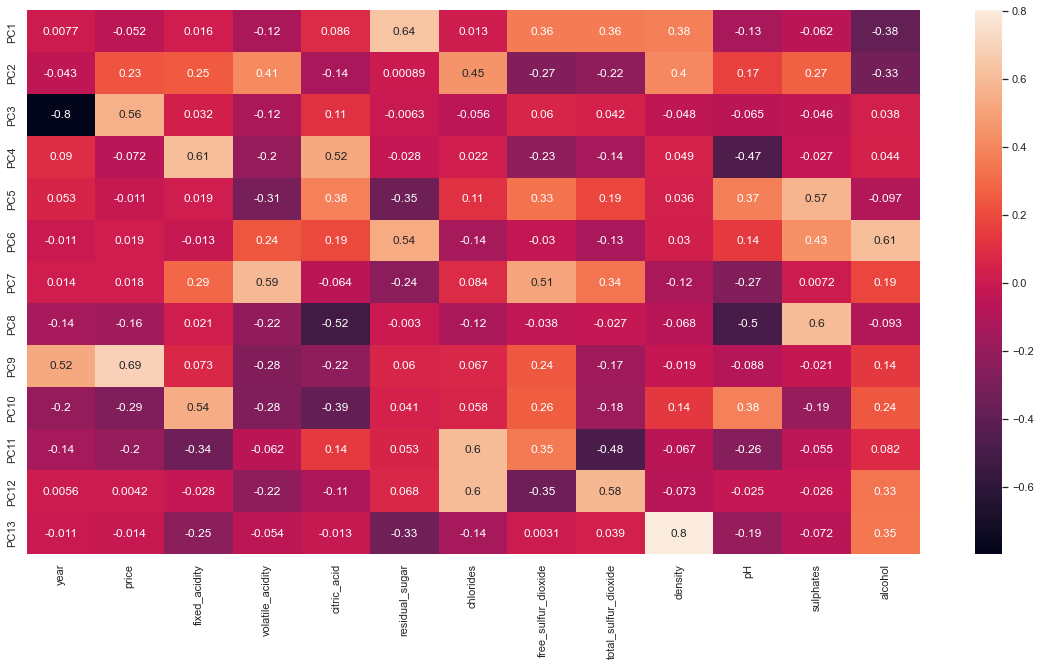

In [31]:
sns.set(rc={'figure.figsize':(20,10)})
# Graficamos los datos de la PCA como heatmap
sns.heatmap(df_wine_numeric_scaled_pca, annot=True)

Con este grafico podemos ver las variables que mas inciden para cada componente, por ejemplo:
- Para el PC1 la variable que mas incide en residual_sugar
- Para el PC2 la variable que mas incide en chlorides
- Para el PC3 la variable que mas incide en price

Y asu sucesivamente.

In [48]:
# Observamos la varianza explicada de cada component para eso utilizamos .explained_variance_ratio_
pd.Series( pca_model.explained_variance_ratio_.round(4) * 100, index=list_pcs)


PC1     26.79
PC2     18.52
PC3     10.51
PC4      9.35
PC5      7.88
PC6      6.13
PC7      5.63
PC8      4.11
PC9      3.46
PC10     3.06
PC11     2.55
PC12     1.81
PC13     0.19
dtype: float64

Podemos observar que el componenete PC1 explica el 26.79 % de los datos y el PC2 explica el 18.52 % de los datos

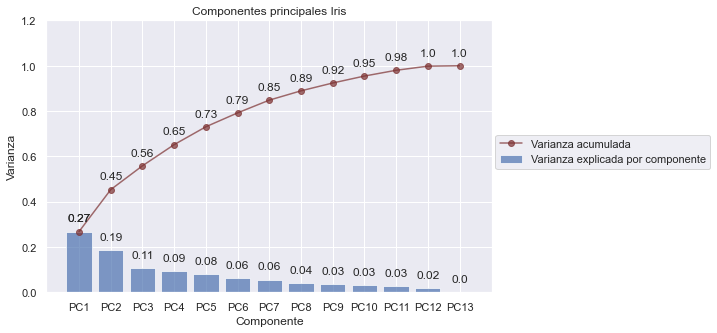

In [49]:
# Graficamos la varianza de cada PC y la varianza acumulada
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(list_pcs, pca_model.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')
ax.plot(list_pcs, pca_model.explained_variance_ratio_.cumsum(), 'o-', alpha=0.7, label='Varianza acumulada', color=COLOR_VINO_TINTO)
for x, y in zip(np.arange(len(df_scaled.columns)), pca_model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center'
               )
for x, y in zip(np.arange(len(df_scaled.columns)), pca_model.explained_variance_ratio_.cumsum()):
    label = round(y, 2)
    ax.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center'
               )
ax.set_title('Componentes principales Iris')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

Hasta el PC7 tenemos el 85% de los datos explicados.
Para esta instancia tenemos dos criterios para determinar con que componentes principales nos quedamos ya que el objetivo es redusir dimensionalidad.


Por un lado tenemos el criterio de varianza acumulada superior a un umbral, que por lo general se recomienda mayor al 80% de la varianza total. Para este caso tendriamos que tomar los compoenentes hasta el PC7.
Por otro lado tenemos el criterio del autovalor > 1 donde sumamos por cada componente el autovalor y si la suma es mayor a 1, entonces ese componente es importante.



In [52]:
# criterio del autovalor
ds_autovalue = pd.Series(df_wine_numeric_scaled_pca.sum(axis=1), index=list_pcs)
ds_autovalue

PC1     1.107123
PC2     1.183180
PC3    -0.298644
PC4     0.180175
PC5     1.280594
PC6     1.867226
PC7     1.341821
PC8    -1.261898
PC9     0.993837
PC10    0.133380
PC11   -0.373526
PC12    0.758772
PC13    0.112374
dtype: float64

In [53]:
# Filtramos los que cumplen con el criterio de mayor a 1
ds_autovalue_filtered = ds_autovalue[ds_autovalue > 1]
ds_autovalue_filtered

PC1    1.107123
PC2    1.183180
PC5    1.280594
PC6    1.867226
PC7    1.341821
dtype: float64

Segun el criterio del autovalor debemos quedarnos con los componentes [PC1, PC2, PC5, PC6, PC7]. Para esta ocasion opataremos por este criterio en vez de la varianza acumulada ya que tiene mas fundamentos estadicos.

Teniendo identificadas las columnas, ahora nos queda calcular la transformacion de los datos originales con .transform()

In [56]:
# Utilizamos .transform calcular la funcion para cada datos y generar el resultado
df_wine_transform_pca = pd.DataFrame(pca_model.transform(df_scaled), columns=list_pcs, index=df_scaled.index)
print(f"{df_wine_transform_pca.shape=}")
df_wine_transform_pca.head()

df_wine_transform_pca.shape=(5013, 13)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.305926,0.757400,0.013100,-0.205716,-0.325291,-0.214702,0.190483,-0.039586,0.218280,0.024884,-0.139485,-0.096919,-0.002008
1,-0.084796,0.690995,0.039168,-0.001420,0.196268,0.329449,0.050096,-0.033345,0.188669,-0.224671,-0.114318,0.041223,0.027912
2,-0.301476,0.894188,0.115620,-0.338537,-0.208230,-0.216697,0.136748,-0.051579,0.441484,-0.238532,0.047138,0.088443,-0.032084
3,-0.076054,0.651771,-0.093845,0.014899,0.200872,0.325854,0.047974,-0.015076,0.104644,-0.189045,-0.089141,0.040832,0.029583
4,-0.088164,0.516868,0.086067,0.379358,0.584555,0.085229,0.087850,-0.202617,0.379305,-0.131291,0.090561,0.117259,0.015721


In [59]:
# Nos quedamos solamente con las columnas que cumplieron el criterio del autovalor
df_wine_transform_pca = df_wine_transform_pca[ds_autovalue_filtered.index]
print(f"{df_wine_transform_pca.shape=}")
df_wine_transform_pca.head()

df_wine_transform_pca.shape=(5013, 5)


,PC1,PC2,PC5,PC6,PC7
0,-0.305926,0.757400,-0.325291,-0.214702,0.190483
1,-0.084796,0.690995,0.196268,0.329449,0.050096
2,-0.301476,0.894188,-0.208230,-0.216697,0.136748
3,-0.076054,0.651771,0.200872,0.325854,0.047974
4,-0.088164,0.516868,0.584555,0.085229,0.087850


In [60]:
# Agregamos la columna quality al dataframe
df_wine_transform_pca['quality'] = df_wine.quality
df_wine_transform_pca.head()

,PC1,PC2,PC5,PC6,PC7,quality
0,-0.305926,0.757400,-0.325291,-0.214702,0.190483,5
1,-0.084796,0.690995,0.196268,0.329449,0.050096,5
2,-0.301476,0.894188,-0.208230,-0.216697,0.136748,5
3,-0.076054,0.651771,0.200872,0.325854,0.047974,5
4,-0.088164,0.516868,0.584555,0.085229,0.087850,7


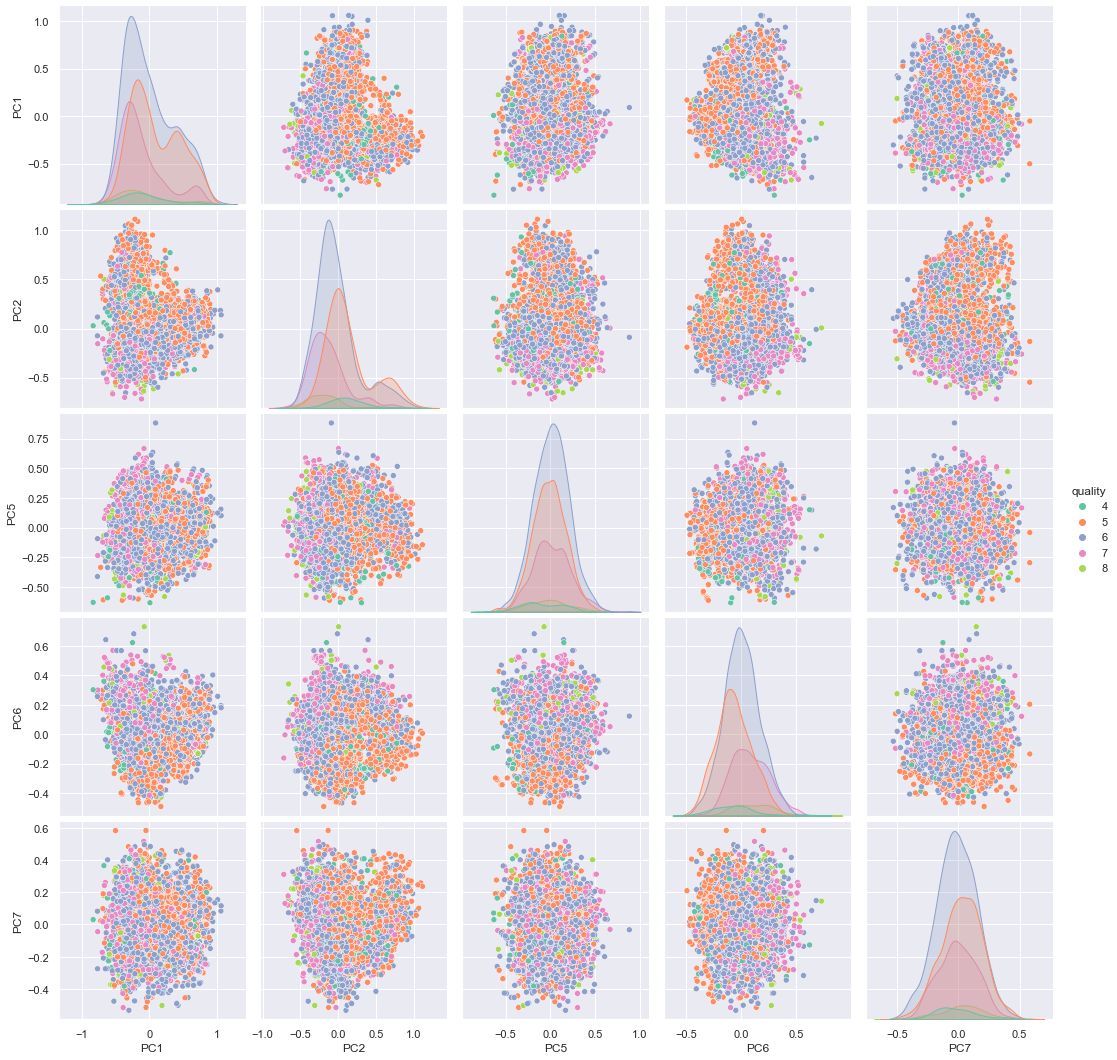

In [61]:
# Graficamos para ver la distribución y la relación entre las componentes elegidas
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(df_wine_transform_pca,hue = 'quality', height = 3 , palette = 'Set2')

El grafico no muestra una separacion clara para distinguir sengun los componentes qual sería el valor de quality asignado. El analisis de PCA no nos da nada concluyente, esto se puede deber a que los datos se obtuvieron de distintas fuentes sin una relacion clara